---

# Compactified  $\phi^2 + \exp^{\lambda\chi}$  Inflation

### $z=\frac{H}{H_0 + H}$  is bounded
---

---
**Author**:      Efrain Torres-Lomas 

**Email**:       ``efrain@fisica.ugto.mx``

**Github**:      https://github.com/elchinot7

**Bitbucket**:   https://bitbucket.org/elchinot7/pyncare

**Date**:        September 2016

---

## Note:
#### Here I will use the ``pyncare`` Python package.

You can get it by doing:

    git clone https://elchinot7@bitbucket.org/elchinot7/pyncare.git

To install:

    python setup.py install
    

## Importing ``pyncare`` and other packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict

#from pyncare.models import compact_dyn_sys_phi2
from pyncare.utils import plot_latitude
from pyncare import BaseDynSys

%matplotlib notebook
#%matplotlib inline

import seaborn as sns
sns.set()
sns.set_context("notebook") # paper, notebook, talk, and poster


# The Model:

$$V=\frac{1}{2}m^2\phi^2 + \exp^{-\lambda \chi}$$

## The system:

\begin{eqnarray}
&& x_m^\prime = -3 \left(1 - x_m^2 - x_e^2\right) x_m + \frac{1}{2} y_m  \frac{z0 }{z} \left(1-z\right)  \\
&& x_e^\prime = -3 \left(1 - x_m^2 - x_e^2\right) x_e + \frac{\alpha}{2} \left(1 - x_m^2 - x_e^2 - y_m^2\right) \\
&& y_m^\prime = 3 \left(x_m^2 + x_e^2\right) y_m - \frac{1}{2} x_m  \frac{z0 }{z} \left(1-z\right)  \\
&& z^\prime = 3 \left(x_m^2 + x_e^2\right) z \left(z-1\right)
\end{eqnarray}

In [2]:
def phi2_plus_exp_dynsys_bounded(init, t=None, modelpars=[1.0, 1.0]):
        if t is None:
            t = 1.0  # This is used to allows a call from "plot_vector_flow()"
        xm = init[0]
        xe = init[1]
        ym = init[2]
        z = init[3]
        
        alpha = modelpars[0]
        z0 = modelpars[1]

        # the model equations
        A = xm**2.0 + xe**2.0
        B = z0 * (1.0 - z) / z
        xm_dot = -3.0 * (1.0 - A) * xm + ym * B / 2.0
        xe_dot = -3.0 * (1.0 - A) * xe + alpha * (1.0 - A - ym**2.0) / 2.0
        ym_dot = 3.0 * A * ym - xm * B / 2.0
        z_dot =  3.0 * A * z * ( z - 1.0)
        return [xm_dot, xe_dot, xe_dot, z_dot]

# Numerical Solution:

- Define the Dynamical System Object
- Solve & Plot the orbits
- Add the constraints plots

**New!** Now is ease to use different predefined color schemes!

Just set

    colors='colorscheme'

where 'colorscheme' is one of 

    [None, 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']


<IPython.core.display.Javascript object>


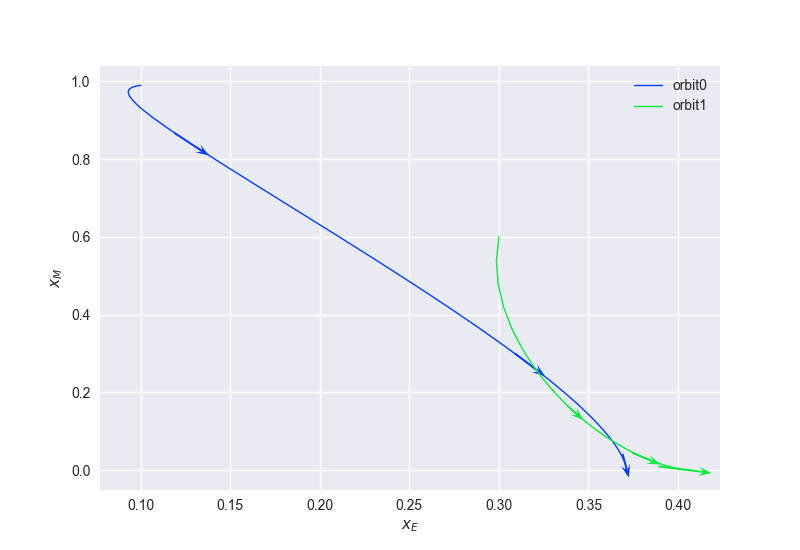

<IPython.core.display.Javascript object>


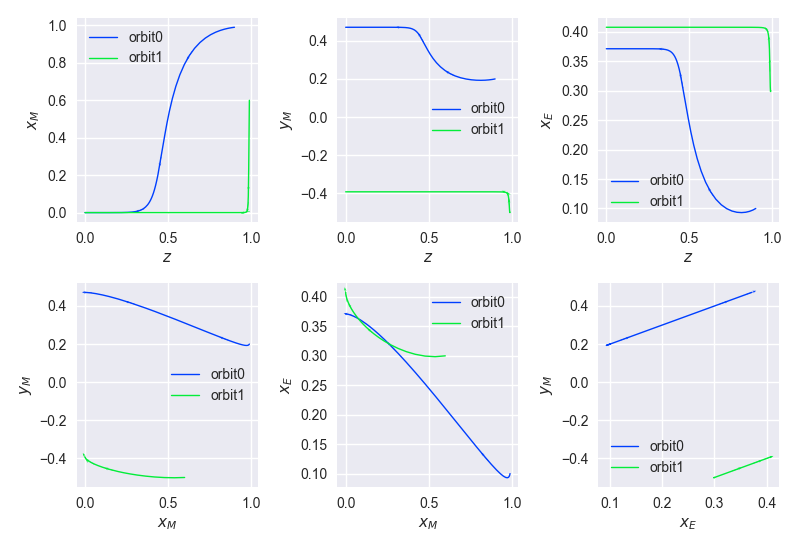

In [3]:
a = 3.0
z0= 0.0

t = np.linspace(0.0, 30.6, 500)

var_names = {'xm': r'$x_M$', 'xe': r'$x_E$', 'ym': r'$y_M$', 'z': r'$z$'}

arrow_pos = [10, 20, 40]

orbits = [{'vars': OrderedDict([('xm', 0.99), ('xe', 0.1), ('ym', 0.2), ('z', 0.9)]), 
           't': t,
           'arrow_pos': arrow_pos,
           'label': 'orbit0'},
          {'vars': OrderedDict([('xm', 0.6), ('xe', 0.3), ('ym', -0.5), ('z', 0.99)]), 
           't': t,
           'arrow_pos': arrow_pos,
           'label': 'orbit1'}
         ]
dynsys = BaseDynSys(model=phi2_plus_exp_dynsys_bounded,
                    model_pars=[a, z0],
                    var_names=var_names,
                    Ndim=4,
                    orbits=orbits,
                    lines=None,
                    #colors='black',
                    #colors='dark'
                    colors='bright'
                    )
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111)
dynsys.plot_orbits(ax=ax, vars_to_plot=['xe', 'xm'], add_flow=True, lw=1)

fig1 = plt.figure()
#ax = Axes3D(fig1)
ax1 = fig1.add_subplot(231)
ax2 = fig1.add_subplot(232)
ax3 = fig1.add_subplot(233)
ax4 = fig1.add_subplot(234)
ax5 = fig1.add_subplot(235)
ax6 = fig1.add_subplot(236)

dynsys.plot_orbits(ax=ax1, vars_to_plot=['z', 'xm'], add_flow=True, lw=1)
dynsys.plot_orbits(ax=ax2, vars_to_plot=['z', 'ym'], add_flow=True, lw=1)
dynsys.plot_orbits(ax=ax3, vars_to_plot=['z', 'xe'], add_flow=True, lw=1)
dynsys.plot_orbits(ax=ax4, vars_to_plot=['xm', 'ym'], add_flow=True, lw=1)
dynsys.plot_orbits(ax=ax5, vars_to_plot=['xm', 'xe'], add_flow=True, lw=1)
dynsys.plot_orbits(ax=ax6, vars_to_plot=['xe', 'ym'], add_flow=True, lw=1)

plt.tight_layout()

['xm', 'xe', 'ym', 'z']


<IPython.core.display.Javascript object>


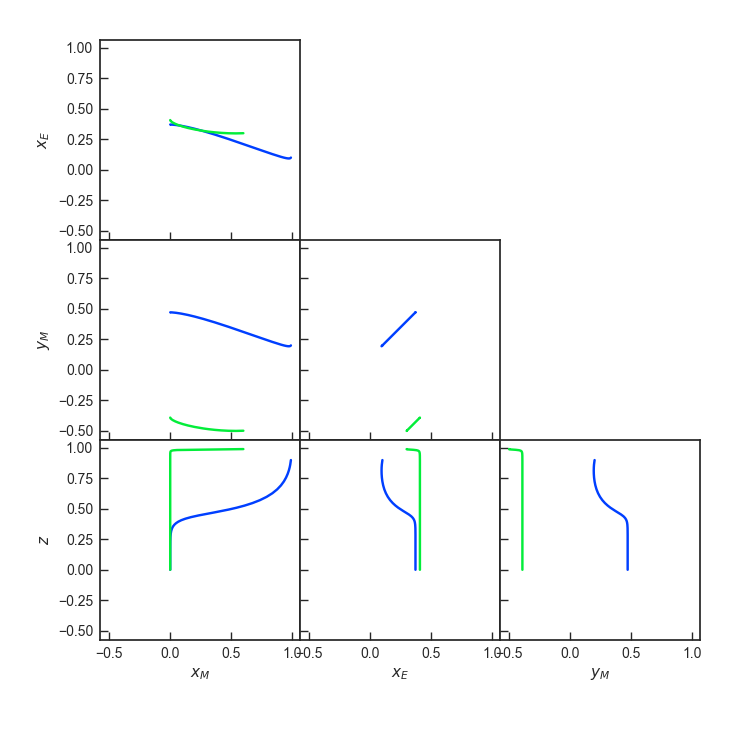

 -----------------------------
(i, j) = (0,0)
varx = xm
vary = z
subplotx = 2
subploty = 0
 -----------------------------
(i, j) = (0,1)
varx = xe
vary = z
subplotx = 2
subploty = 1
 -----------------------------
(i, j) = (0,2)
varx = ym
vary = z
subplotx = 2
subploty = 2
 -----------------------------
(i, j) = (1,0)
varx = xm
vary = ym
subplotx = 1
subploty = 0
 -----------------------------
(i, j) = (1,1)
varx = xe
vary = ym
subplotx = 1
subploty = 1
 -----------------------------
(i, j) = (1,2)
varx = ym
vary = ym
subplotx = 1
subploty = 2
 -----------------------------
(i, j) = (2,0)
varx = xm
vary = xe
subplotx = 0
subploty = 0
 -----------------------------
(i, j) = (2,1)
varx = xe
vary = xe
subplotx = 0
subploty = 1
 -----------------------------
(i, j) = (2,2)
varx = ym
vary = xe
subplotx = 0
subploty = 2


In [4]:
with sns.axes_style("ticks"):
    dynsys.triangle()